# Build makemore part 2: MLP

ref: [link](https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqbnlaUC1QRDJYN3JVNDRUZkRWNl9FcGxzVFkxQXxBQ3Jtc0trem1EYm15a0d6cG1FSnBhbnJHWWxWZFJTWFZpOHhld244ODhrWG5iYnhmLUx2dnpDQmRDZ2E4VHhwV3BDR2xnRTdrUVJkbndJbGtCOTZpWmpSVkFxRUVrcXVsSktoUjM3SEVoSVZnVkJrMkh1eUFoVQ&q=https%3A%2F%2Fwww.jmlr.org%2Fpapers%2Fvolume3%2Fbengio03a%2Fbengio03a.pdf&v=TCH_1BHY58I)

In [2]:
import torch 
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
words = open('names.txt', 'r').read().splitlines()
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(stoi)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}


In [57]:
block_size = 3
X,Y = [], []
for w in words:
    #print(w)
    context = [0]*block_size
    for ch in w+'.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [14]:
# embedding table
C = torch.randn((27,2))
emb = C[X]
emb.shape

torch.Size([67, 3, 2])

In [20]:
W1 = torch.randn((6,100))
b1 = torch.randn(100)
h = torch.tanh(emb.view(-1,6) @ W1 + b1)
h.shape

torch.Size([67, 100])

In [31]:
W2 = torch.randn((100,27))
b2 = torch.randn(27)

logits = h @ W2 + b2
# counts = logits.exp()
# prob = counts/counts.sum(1, keepdim=True)
# loss = -prob[torch.arange(len(Y)), Y].log().mean()
# loss

tensor(inf)

THINK ABOUT THE EFFICIENCY, USE CROSS_ENTROPY IS BETTER WAY TO DO

In [30]:
loss = F.cross_entropy(logits, Y)
loss

tensor(43.7898)

The whole training loop can be created

In [75]:
block_size = 3
X,Y = [], []
for w in words:
    #print(w)
    context = [0]*block_size
    for ch in w+'.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [76]:
epochs = 1000
lre = torch.linspace(-3,0,epochs)
lrs = 10**lre
C = torch.randn((27,2))
W1 = torch.randn((6,100))
b1 = torch.randn(100)
W2 = torch.randn((100,27))
b2 = torch.randn(27)
params = [W1, b1, W2, b2, C]
for p in params:
    p.requires_grad = True

lri = []
lossi = []
for i in range(epochs):
    ix = torch.randint(0,X.shape[0],(32,))
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1,6)) @ W1 + b1
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])
    print(loss.item())
    for p in params:
        p.grad = None
    loss.backward()
    for p in params:
        p.data += -lrs[i] * p.grad 
        
    lri.append(lrs[i])
    lossi.append(loss.item())


37.34195327758789
29.982589721679688
29.073577880859375
32.66349792480469
29.573078155517578
35.88673400878906
33.774776458740234
32.06817626953125
32.60796356201172
28.330156326293945
35.51603317260742
28.925493240356445
30.93549346923828
27.10009765625
26.30333709716797
30.244375228881836
30.268247604370117
28.988901138305664
31.25337028503418
25.536027908325195
30.71840476989746
26.611572265625
33.913414001464844
26.793556213378906
28.23091697692871
34.27464294433594
25.82910919189453
31.106128692626953
31.863079071044922
26.17315101623535
37.4027214050293
30.212345123291016
27.702234268188477
26.726778030395508
27.198509216308594
26.558534622192383
23.797176361083984
28.825956344604492
26.96617889404297
27.535558700561523
33.88301086425781
30.903263092041016
29.083335876464844
27.15201759338379
27.430042266845703
30.426851272583008
27.5564022064209
26.462448120117188
27.00006675720215
30.597238540649414
25.426082611083984
29.95631980895996
29.55649757385254
23.295236587524414
28.18

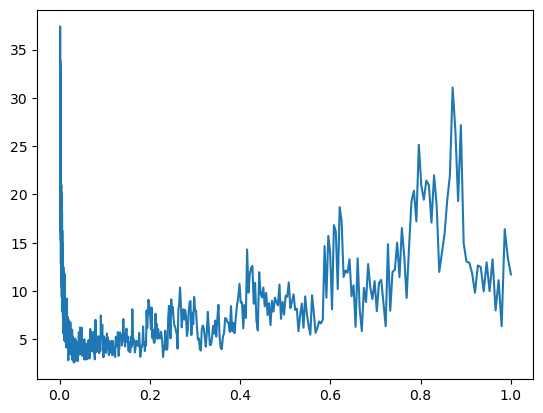

In [77]:
plt.plot(lri, lossi)